# 利用blast绘制MaxID图像

In [1]:
from Bio.Blast import NCBIWWW
from Bio.Blast import NCBIXML
import matplotlib.pyplot as plt
from time import sleep
import pickle
import os
from matplotlib.ticker import FuncFormatter

调用blast接口，获取比对结果

In [2]:
in_path = ["data/samples_p_0.75.txt", "data/samples_p_0.5.txt", "data/samples_p_0.25.txt"]
out_path = ["data/samples_p_0.75.xml", "data/samples_p_0.5.xml", "data/samples_p_0.25.xml"]

# blastp：是使用蛋白质序列与蛋白质数据库中的序列进行比对
# nr: 是NCBI的默认算法，由于原文中没有说明故选择默认
def get_blastp_xml(in_path, out_path, num_seq=100):
    '''调用NCBI的blastp接口，获取xml格式的结果文件

    Params:
        in_path: 原始数据文件
        out_path: 保存结果的文件
        num_seq: 需要处理的序列数
    '''

    origin_txt = open(in_path, "r")
    save_file = open(out_path, "a")

    cnt = 0
    for line in origin_txt.readlines():
        if cnt < num_seq:
            if (cnt + 1) % 5 == 0:
                sleep(60)
            str = line[:line.find(",")]
            result_handle = NCBIWWW.qblast("blastp", "nr", str)
            save_file.write(result_handle.read())
        cnt += 1
        print(cnt)

    save_file.close()
    result_handle.close()


for i in range(len(out_path)):
        if not os.path.exists(out_path[i]):
            print("Processing: ", in_path[i])
            get_blastp_xml(in_path[i], out_path[i])

## 每个P绘制不同的图像

In [8]:
# 设置全局字体为times new roman和字体大小
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 20
color_blue = '#2878b5'
color_orange = '#D87C7C'
p=0.75

def to_percent(x, position):
    return '%1.0f%%' % (x)

formatter = FuncFormatter(to_percent)

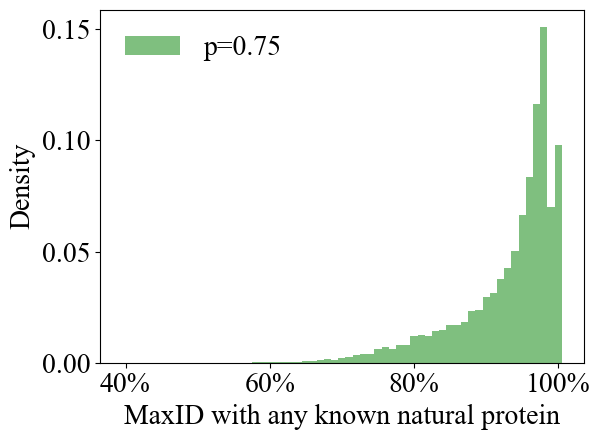

In [9]:
'''绘制三种概率的图像，每个p单独一个图像'''
with open("./data/25.txt", "rb") as f:
    result25 = pickle.load(f)
with open("./data/50.txt", "rb") as f:
    result50 = pickle.load(f)
with open("./data/75.txt", "rb") as f:
    result75 = pickle.load(f)

plt.xlabel("MaxID with any known natural protein", fontsize=20)
plt.gca().xaxis.set_major_formatter(formatter)
# y轴标签显示两位小数
plt.gca().yaxis.set_major_formatter('{:.2f}'.format)
plt.ylabel("Density", fontsize=20)

label = "p=" + str(p)
color_dict = {0.25: "grey", 0.5: "blue", 0.75: "green"}
if p == 0.25:
    result = result25
elif p == 0.5:
    result = result50
else:
    result = result75

plt.bar([i for i in range(40, 101)], result[40:], alpha=0.5, width=1, label=label, color=color_dict[p])
plt.legend(loc='upper left', prop={'size': 20}, frameon=False)
# 刻度值字体大小设置（x轴和y轴同时设置）
plt.tick_params(labelsize=20)
plt.tight_layout()
plt.show()

## 将3个p汇总

单色图

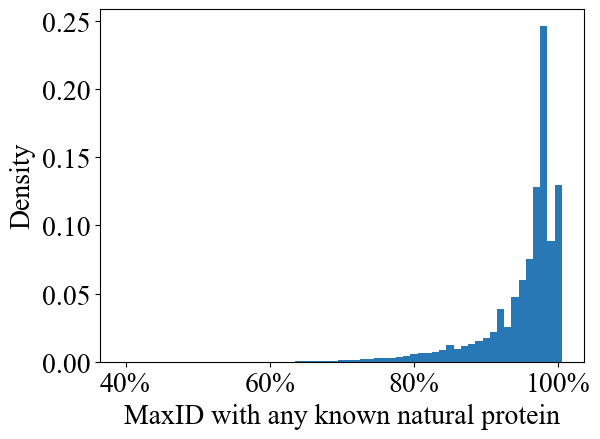

In [5]:
'''绘制三种概率的图像，单色图'''

with open("./data/25.txt", "rb") as f:
    result25 = pickle.load(f)
with open("./data/50.txt", "rb") as f:
    result50 = pickle.load(f)
with open("./data/75.txt", "rb") as f:
    result75 = pickle.load(f)
len_list = [len(result25), len(result50), len(result75)]
total_len = sum(len_list)
result25 = [result25[i] * len_list[0] / total_len for i in range(101)]
result50 = [result50[i] * len_list[1] / total_len for i in range(101)]
result75 = [result75[i] * len_list[2] / total_len for i in range(101)]
result = [result25[i] + result50[i] + result75[i] for i in range(101)]

plt.xlabel("MaxID with any known natural protein", fontsize=20)
plt.gca().xaxis.set_major_formatter(formatter)
plt.ylabel("Density", fontsize=20)
# 刻度值字体大小设置（x轴和y轴同时设置）
plt.tick_params(labelsize=20)
plt.bar([i for i in range(40, 101)], result[40:], alpha=1, color=color_blue, width=1)
plt.tight_layout()
plt.show()

多色图

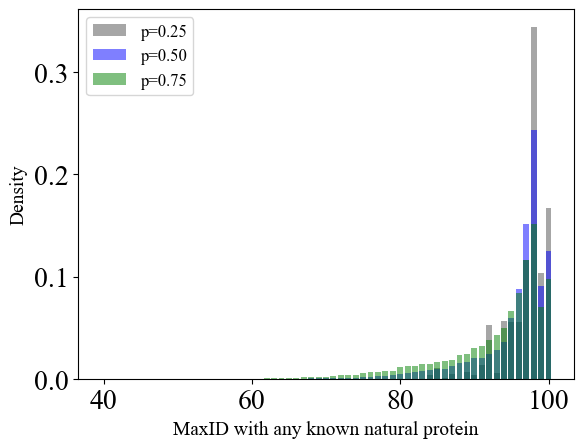

In [24]:
'''绘制三种概率的图像，三色图'''

with open("./data/25.txt", "rb") as f:
    result25 = pickle.load(f)
with open("./data/50.txt", "rb") as f:
    result50 = pickle.load(f)
with open("./data/75.txt", "rb") as f:
    result75 = pickle.load(f)

plt.xlabel("MaxID with any known natural protein", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.bar([i for i in range(40, 101)], result25[40:], alpha=0.7, label="p=0.25", color="grey")
plt.bar([i for i in range(40, 101)], result50[40:], alpha=0.5, label="p=0.50", color="blue")
plt.bar([i for i in range(40, 101)], result75[40:], alpha=0.5, label="p=0.75", color="green")
plt.legend(loc='upper left', prop={'size': 12})
plt.show()